In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',95)
pd.set_option('display.max_rows',None)
import pickle
import re
import datetime
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Opening the pickled file
f = open('df6.pkl', 'rb')
df6 = pickle.load(f)
f.close()

In [3]:
# Opening the pickled file
f = open('df5.pkl', 'rb')
df5 = pickle.load(f)
f.close()

In [4]:
df6.head()

,date,store_number,sale_dollars
0,2012-03-27,2534,94.02
1,2015-08-25,4924,33.00
2,2013-02-21,4652,40.48
3,2014-01-27,4794,8.99
4,2013-09-09,2647,80.94


In [5]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20095649 entries, 0 to 20095648
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_number  int64         
 2   sale_dollars  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 613.3 MB


In [6]:
df6['store_number'] = df6['store_number'].astype('category')

In [7]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20095649 entries, 0 to 20095648
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_number  category      
 2   sale_dollars  float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 498.4 MB


In [8]:
X=df6.groupby([pd.Grouper(key='date', freq='M'), 'store_number'])['sale_dollars'].sum()

In [9]:
Y=X.reset_index().pivot(index='date', columns='store_number', values='sale_dollars')

In [10]:
Y.columns

CategoricalIndex([2106, 2113, 2130, 2132, 2152, 2161, 2178, 2190, 2191, 2200,
                  ...
                  9928, 9929, 9930, 9931, 9932, 9934, 9936, 9937, 9938, 9946],
                 categories=[2106, 2113, 2130, 2132, 2152, 2161, 2178, 2190, ...], ordered=False, name='store_number', dtype='category', length=2506)

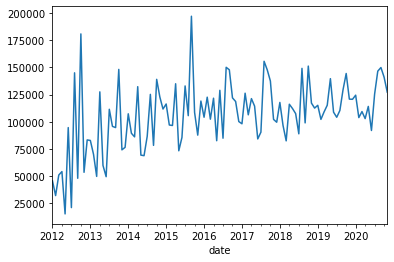

In [11]:
Y.loc[:,2500].plot(kind='line')

In [12]:
X2=X.reset_index()

In [13]:
X2['month'] = X2.date.dt.month

In [14]:
S=pd.pivot_table(X2, index='month', columns='store_number', values='sale_dollars', aggfunc='mean')

In [15]:
S.head()

store_number,2106,2113,2130,2132,2152,2161,2178,2190,2191,2200,2205,2228,2233,2238,2248,2260,2285,2290,2327,2353,2367,2413,2422,2445,2448,2459,2460,2465,2475,2478,2487,2498,2500,2501,2502,2503,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,...,6071,6072,6073,6074,6075,6076,6078,6080,9001,9002,9010,9013,9014,9017,9018,9022,9023,9031,9034,9037,9038,9039,9041,9042,9046,9901,9902,9906,9910,9911,9912,9913,9919,9922,9923,9925,9927,9928,9929,9930,9931,9932,9934,9936,9937,9938,9946
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,96197.675556,6050.527778,82190.126667,12619.20,5962.1740,6110.59,17351.972222,155668.092222,76145.032222,16418.738889,17893.1825,15498.967778,22337.944444,2901.232222,35878.136667,2046.18,46617.917778,34715.676,6010.452857,27839.3500,11981.3575,64752.281667,2872.01,5635.196667,17262.751429,6209.914444,15069.498571,58901.276667,10062.11750,16444.596667,35852.4200,2253.200,101345.086667,101859.751111,76168.105556,9638.465,46888.620000,89743.645556,21209.311111,61972.628889,39105.406667,21143.870000,9754.57,275608.456667,52695.053333,17781.420000,87046.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9647.955556,13027.971111,995.352,4520.148,181.68,NaN,NaN,NaN,766.68,4077.00,1386.24,1327.50,45240.0,21828.96,3194.46,1290.36,NaN,1469.61,998.91,7093.945,NaN,8260.955,NaN,416.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,346.56,31.14,NaN,NaN,NaN
2,94216.032222,4968.933333,97031.082222,17813.64,6404.3620,5180.26,19481.962222,167132.603333,95064.298889,16889.410000,14736.1375,15654.501111,17903.494444,5028.746667,46991.427778,NaN,50502.745556,42793.828,6380.837143,39783.8540,13275.8750,60366.938333,NaN,5195.861111,15709.402857,5278.662222,22729.975000,58631.981111,8969.09625,19147.265556,31182.1125,2281.980,93389.592222,112226.932222,101527.613333,9978.515,55016.455556,94422.632222,20228.270000,60500.046667,41829.032222,19904.603333,11135.39,322685.720000,48304.005556,18618.387778,89292.162222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10027.340000,12447.270000,1823.370,3670.310,NaN,NaN,19278.9,2321.76,1655.60,1210.50,NaN,540.00,11762.4,821.10,3224.58,2528.28,NaN,2183.28,1453.08,6249.155,NaN,9705.385,213.65,213.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,NaN,NaN,NaN,NaN,NaN
3,101089.765556,6568.591250,106626.107778,13040.13,6896.5300,7482.77,23996.854444,193011.040000,95615.660000,16542.052222,17699.9650,19735.697778,19680.150000,8225.065556,46298.652222,NaN,48728.002222,43974.678,7474.330000,35277.2200,16851.0700,66064.143333,NaN,6881.014444,16633.205714,6461.253333,24183.645000,64490.405556,10461.49250,15738.894444,30294.0225,1912.304,88157.162222,104761.076667,97556.460000,9130.265,46424.624444,109185.857778,22096.418889,80221.933333,42010.446667,15369.230000,18232.05,337220.663333,47064.790000,13102.713333,111790.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11200.720000,15728.071429,2026.660,5286.816,NaN,NaN,NaN,NaN,1425.06,4477.50,NaN,2533.50,NaN,23678.85,2304.09,687.06,NaN,2654.46,1011.99,8992.170,125.06,11937.300,176.16,467.28,287.89,NaN,NaN,237.24,325.68,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96877.883333,6996.051250,79423.936667,13712.98,8074.4175,7669.52,22357.262222,199345.260000,94236.927778,18462.004444,17316.4550,17979.184444,23109.727778,8137.232222,52366.830000,NaN,57989.787778,42994.080,6417.660000,42091.6025,14288.3275,70038.683333,NaN,6146.665556,15602.705714,6052.052222,23481.046667,66120.494444,9596.32750,20502.321250,29460.5150,2251.648,114034.956667,128127.490000,153548.097778,9708.090,51717.502222,107609.390000,22985.853333,66279.602222,44710.126667,14443.246667,5412.47,360202.028889,52089.675556,16943.123333,117289.003333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13938.966667,18250.582500,803.688,4005.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.75,NaN,641.22,7158.09,4356.12,NaN,1958.04,1246.92,10602.875,177.48,13139.425,112.44,472.11,NaN,NaN,NaN,129.24,NaN,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,106042.963333,6875.158750,84518.315556,NaN,8078.6600,5379.

In [16]:
result=S.dropna(how='any', axis=1) # use only stores with long history

In [17]:
# Standardize rows
result2 = result.apply(lambda t:(t-t.mean())/t.std(), axis=0)

In [18]:
result2.shape

(12, 1975)

In [19]:
result2.T.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
store_number,,,,,,,,,,,,
2106,-0.521864,-0.790084,0.140292,-0.429796,0.810719,-0.590412,-1.041368,0.808283,-0.994385,1.486317,-0.728751,1.851049
2113,-0.643213,-1.652165,-0.159944,0.238807,0.126034,1.651907,0.280482,-0.769826,-0.496930,0.295119,-0.736262,1.865991
2130,-0.922607,0.666960,1.694653,-1.218884,-0.673242,-0.680688,-0.227146,0.676744,-1.397732,1.037948,0.107079,0.936914
2152,-1.271325,-0.940603,-0.572499,0.308471,0.311644,0.585162,0.896920,2.051333,-0.431165,-0.225696,-1.388990,0.676747
2178,-1.378258,-0.988300,-0.161714,-0.461890,0.465703,-0.334033,0.284670,-0.169766,-0.887877,1.049596,0.236692,2.345178


### clusters = 4

In [20]:
km4 = KMeans(n_clusters=4)
km4.fit(result2.T)

KMeans(n_clusters=4)

Text(0.5, 0, 'Month')

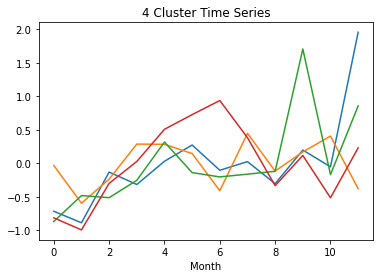

In [21]:
plt.plot(km4.cluster_centers_.T)
plt.title('4 Cluster Time Series')
plt.xlabel('Month')

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
R=pca.fit_transform(result2.T)

Text(0.5, 1.0, 'K = 4')

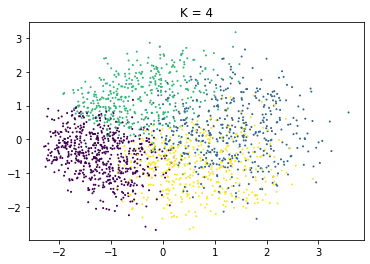

In [23]:
plt.scatter(R[:,0], R[:,1], c=km4.labels_, s=1)
plt.title('K = 4')

### clusters = 3

In [24]:
km3 = KMeans(n_clusters=3)
km3.fit(result2.T)

KMeans(n_clusters=3)

Text(0.5, 0, 'Month')

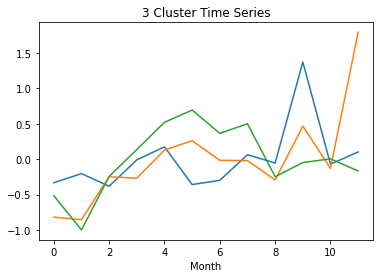

In [25]:
plt.plot(km3.cluster_centers_.T)
plt.title('3 Cluster Time Series')
plt.xlabel('Month')

Text(0.5, 1.0, 'K = 3')

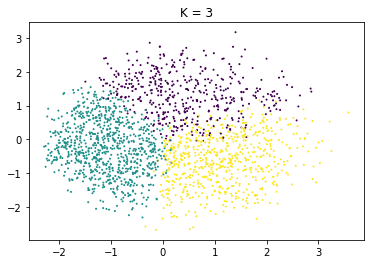

In [26]:
plt.scatter(R[:,0], R[:,1], c=km3.labels_, s=1)
plt.title('K = 3')

In [27]:
inertia = []
for k in range(2,10):
    km3.set_params(n_clusters=k)
    km3.fit(result2.T)
    inertia.append(km3.inertia_)

Text(0.5, 0, '# Clusters')

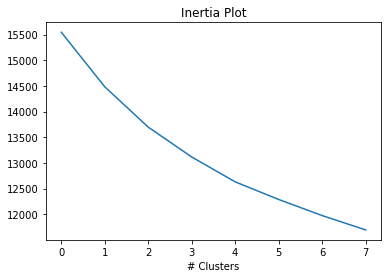

In [28]:
plt.plot(inertia)
plt.title('Inertia Plot')
plt.xlabel('# Clusters')

In [29]:
# Mapping to convert to a dictionary
mapping = pd.Series(km4.labels_, index = result2.T.index)
# also could call result2.columns as this is what it is (columns are the store numbers)

In [30]:
set(km4.labels_)

{0, 1, 2, 3}

In [31]:
mapping = pd.DataFrame(mapping)

In [32]:
mapping = mapping.rename(columns = {0:'cluster'})

In [33]:
mapping = mapping.reset_index()

In [34]:
mapping.head()

,store_number,cluster
0,2106,2
1,2113,0
2,2130,2
3,2152,3
4,2178,0


In [35]:
df5.shape

(20095649, 18)

In [36]:
df7 = pd.merge(df5, mapping, how = 'left', on = 'store_number')

In [37]:
df7.head()

,invoice/item_number,date,store_number,city,zip_code,county_number,county,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,store_name,cat_name,open_store,store_type,cluster
0,S04763500007,2012-03-27,2534,urbandale,50322,77.0,Polk,11788,black velvet,NaN,NaN,6.0,94.02,10.50,hy-vee drugtown / urbandale,whiskey,closed,supermarket,NaN
1,S27474100012,2015-08-25,4924,nashua,50658,19.0,Chickasaw,89194,jose cuervo especial reposado flask,NaN,NaN,4.0,33.00,1.50,abby lea's,tequila,closed,retail store,3.0
2,S10731000040,2013-02-21,4652,davenport,52803,82.0,Scott,34449,ketel one citroen,NaN,NaN,2.0,40.48,1.50,brady mart food & liquor,vodka,open,convenience store,3.0
3,S17037900080,2014-01-27,4794,burlington,52601,29.0,Des Moines,32236,seagrams extra dry gin,NaN,NaN,1.0,8.99,0.75,smokin' joe's #17 tobacco and liquor outlet,gin,open,retail store,0.0
4,S14396900023,2013-09-09,2647,cedar rapids,52411,57.0,Linn,13038,canadian reserve whisky,NaN,NaN,6.0,80.94,10.50,hy-vee #7 / edgewood cedar rapids,whiskey,open,supermarket,2.0


In [38]:
# Dropping the clusters that are NaN
# ~df5['cluster'].isna() #series of boolean values for each index, tilda will do the opposite and then index df5
# df5.head(10)[~df5.head(10)['cluster'].isna()] # notce the head() after the df5 you put the head (after both df5) - it will pull it faster,
# it is a "cheap trick" and also the ~ works as a negator to isna so will pull the non-NaNs
df7 = df7[~df7['cluster'].isna()]

In [39]:
df7.head()

,invoice/item_number,date,store_number,city,zip_code,county_number,county,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,store_name,cat_name,open_store,store_type,cluster
1,S27474100012,2015-08-25,4924,nashua,50658,19.0,Chickasaw,89194,jose cuervo especial reposado flask,NaN,NaN,4.0,33.00,1.50,abby lea's,tequila,closed,retail store,3.0
2,S10731000040,2013-02-21,4652,davenport,52803,82.0,Scott,34449,ketel one citroen,NaN,NaN,2.0,40.48,1.50,brady mart food & liquor,vodka,open,convenience store,3.0
3,S17037900080,2014-01-27,4794,burlington,52601,29.0,Des Moines,32236,seagrams extra dry gin,NaN,NaN,1.0,8.99,0.75,smokin' joe's #17 tobacco and liquor outlet,gin,open,retail store,0.0
4,S14396900023,2013-09-09,2647,cedar rapids,52411,57.0,Linn,13038,canadian reserve whisky,NaN,NaN,6.0,80.94,10.50,hy-vee #7 / edgewood cedar rapids,whiskey,open,supermarket,2.0
5,S23690800026,2015-01-28,3825,des moines,50316,77.0,Polk,43333,captain morgan spiced rum pet,NaN,NaN,48.0,153.60,9.60,shop n save #2 / e 14th,rum,open,convenience store,0.0


In [40]:
# Writing/saving as a pickled file 
# f = open('df7.pkl', 'wb')
# pickle.dump(df7, f)
# f.close()

In [41]:
# Looking at the df with the newly assigned clusters 
A=df7.groupby([pd.Grouper(key='date', freq='M'), 'cluster'])['sale_dollars'].sum()

In [42]:
B=A.reset_index().pivot(index='date', columns='cluster', values='sale_dollars')

In [43]:
B.columns

Float64Index([0.0, 1.0, 2.0, 3.0], dtype='float64', name='cluster')

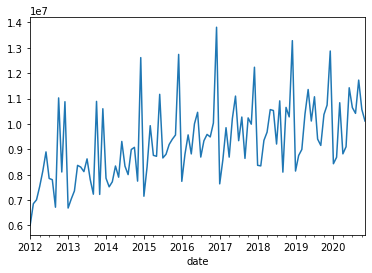

In [44]:
B.loc[:,0.0].plot(kind='line')

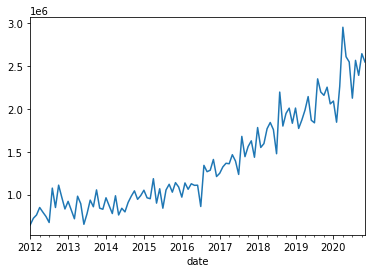

In [45]:
B.loc[:,1.0].plot(kind='line')

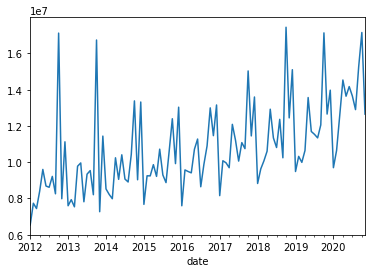

In [46]:
B.loc[:,2.0].plot(kind='line')

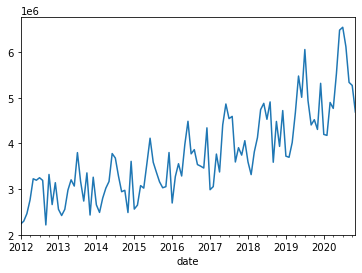

In [47]:
B.loc[:,3.0].plot(kind='line')

In [48]:
# Looking at the df with the newly assigned clusters but using avg sales per store
A2=df7.groupby([pd.Grouper(key='date', freq='M'), 'cluster'])['sale_dollars'].median()

In [49]:
B2=A2.reset_index().pivot(index='date', columns='cluster', values='sale_dollars')

In [50]:
B2.columns

Float64Index([0.0, 1.0, 2.0, 3.0], dtype='float64', name='cluster')

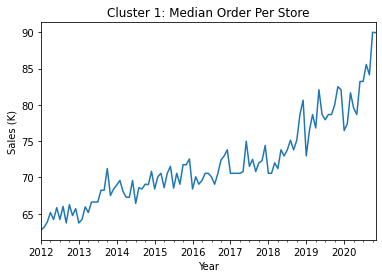

In [81]:
B2.loc[:,0.0].plot(kind='line')
plt.ylabel('Sales (K)')
plt.xlabel('Year')
plt.title('Cluster 1: Median Order Per Store')
plt.savefig('cluster_1.png')

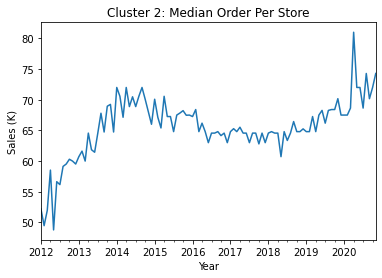

In [82]:
B2.loc[:,1.0].plot(kind='line')
plt.ylabel('Sales (K)')
plt.xlabel('Year')
plt.title('Cluster 2: Median Order Per Store')
plt.savefig('cluster_2.png')

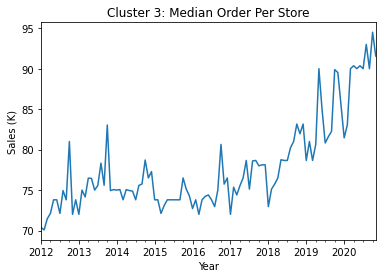

In [83]:
B2.loc[:,2.0].plot(kind='line')
plt.ylabel('Sales (K)')
plt.xlabel('Year')
plt.title('Cluster 3: Median Order Per Store')
plt.savefig('cluster_3.png')

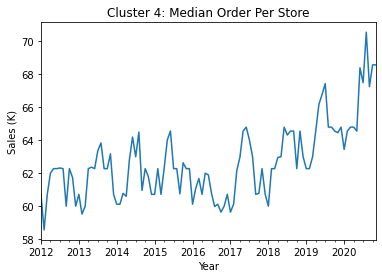

In [84]:
B2.loc[:,3.0].plot(kind='line')
plt.ylabel('Sales (K)')
plt.xlabel('Year')
plt.title('Cluster 4: Median Order Per Store')
plt.savefig('cluster_4.png')

In [55]:
# df7['item_description'].map(lambda t:mapping.get(t)).head()

In [56]:
# data['column number'] = data['item_description'].map(lambda t:mapping.get(t))

In [57]:
df7.groupby('cluster')['cat_name'].count()

cluster
0.0    7241869
1.0    1497063
2.0    7870798
3.0    3270061
Name: cat_name, dtype: int64

In [58]:
W = df7.groupby(['cluster', 'cat_name'])['cat_name'].count().reset_index(name = 'count')

In [59]:
# W

In [60]:
W.rename(columns = {'cat_name':'Category Name', 'cluster':'Cluster'}, inplace = True)

In [61]:
# W.replace(index = {0.0:1, '1.0':'2', '2':'3.0', '3.0':'4.0'}, inplace = True)
W.replace({0.0:1, 1.0:2, 2.0:3, 3.0:4}, inplace = True)

In [62]:
# W

In [63]:
W2 = W.pivot(index = 'Cluster', columns = 'Category Name', values = 'count')

In [64]:
W2.head()

Category Name,accessories,brandy,cocktails,cordials liqueurs,egg nog,gin,grain alcohol,rum,schnapps,special orders,spirits,tequila,vodka,whiskey
Cluster,,,,,,,,,,,,,,
1.0,54539,379652,196465,600346,465,254854,9489,852627,391034,8913,49033,343327,1801606,2299519
2.0,12641,89448,24163,85654,18,42276,799,180379,55812,2507,6889,59679,440370,496428
3.0,66081,365596,282509,673041,705,310523,10843,915957,400753,9875,58960,371373,1991784,2412798
4.0,24829,232575,59268,242166,81,106839,3105,361526,169649,3944,18572,157587,847021,1042899


In [65]:
W2 = W2[['whiskey', 'vodka', 'tequila', 'spirits', 'special orders', 'schnapps', 'rum', 'grain alcohol', 'gin', 'egg nog', 'cordials liqueurs', 'cocktails', 'brandy', 'accessories']]

In [66]:
W3 = W2.apply(lambda t: t/t.sum(), axis = 1)

In [67]:
W3.sum(axis=1)

Cluster
1.0    1.0
2.0    1.0
3.0    1.0
4.0    1.0
dtype: float64

In [68]:
W3.head()

Category Name,whiskey,vodka,tequila,spirits,special orders,schnapps,rum,grain alcohol,gin,egg nog,cordials liqueurs,cocktails,brandy,accessories
Cluster,,,,,,,,,,,,,,
1.0,0.317531,0.248776,0.047409,0.006771,0.001231,0.053996,0.117736,0.001310,0.035192,0.000064,0.082899,0.027129,0.052425,0.007531
2.0,0.331601,0.294156,0.039864,0.004602,0.001675,0.037281,0.120489,0.000534,0.028239,0.000012,0.057215,0.016140,0.059749,0.008444
3.0,0.306551,0.253060,0.047184,0.007491,0.001255,0.050916,0.116374,0.001378,0.039453,0.000090,0.085511,0.035893,0.046450,0.008396
4.0,0.318923,0.259023,0.048191,0.005679,0.001206,0.051879,0.110556,0.000950,0.032672,0.000025,0.074055,0.018124,0.071123,0.007593


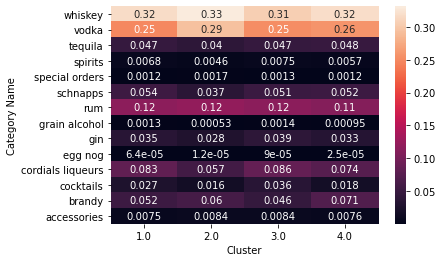

In [69]:
sns.heatmap(W3.T, annot=True)

In [70]:
W3.T.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '15px'}) 

Cluster,1.0,2.0,3.0,4.0
Category Name,,,,
whiskey,0.317531,0.331601,0.306551,0.318923
vodka,0.248776,0.294156,0.253060,0.259023
tequila,0.047409,0.039864,0.047184,0.048191
spirits,0.006771,0.004602,0.007491,0.005679
special orders,0.001231,0.001675,0.001255,0.001206
schnapps,0.053996,0.037281,0.050916,0.051879
rum,0.117736,0.120489,0.116374,0.110556
grain alcohol,0.001310,0.000534,0.001378,0.000950
gin,0.035192,0.028239,0.039453,0.032672


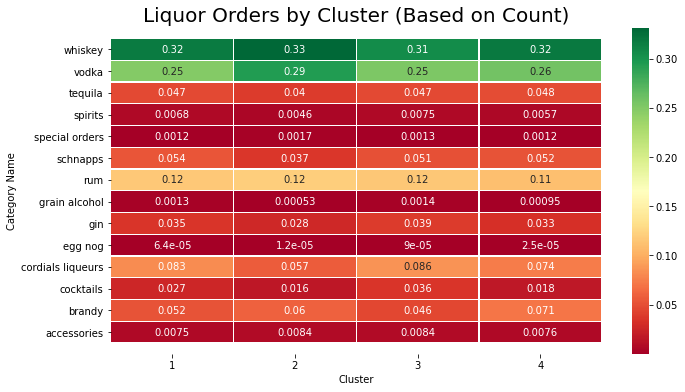

In [86]:
fig, ax = plt.subplots(figsize = (11, 6)) 
x_axis_labels = [1,2,3,4]
sns.heatmap(W3.T, cmap ='RdYlGn', linewidths = 0.30, annot = True, xticklabels=x_axis_labels) 
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Liquor Orders by Cluster (Based on Count)', fontsize =20)
plt.savefig('box.png')

In [72]:
# Looking at the df with the newly assigned clusters but using avg sales per store
G1 = df7.groupby([pd.Grouper(key='date', freq='Q'), 'cluster', 'cat_name'])['sale_dollars'].median()

In [73]:
G1

date        cluster  cat_name         
2012-03-31  0.0      accessories            89.430
                     brandy                 33.040
                     cocktails              58.440
                     cordials liqueurs      56.040
                     gin                    59.910
                     grain alcohol          72.180
                     rum                    68.220
                     schnapps               38.970
                     spirits                85.560
                     tequila                70.590
                     vodka                  63.600
                     whiskey                71.040
            1.0      accessories            71.265
                     brandy                 45.000
                     cocktails              24.600
                     cordials liqueurs      37.860
                     gin                    37.480
                     grain alcohol          36.090
                     rum                   

In [74]:
G3 = G1.reset_index().pivot(index='date', columns='cluster', values='sale_dollars')

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
G3.head()

In [ ]:
G3.loc[:,0.0].plot(kind='line')
plt.ylabel('Sales (K)')
plt.xlabel('Year')
plt.title('Cluster 1: Average Sales Per Store')

In [ ]:
df7.head()

In [ ]:
S1 = df7.groupby([pd.Grouper(key='date', freq='Q'), 'cluster', 'cat_name', 'item_description'])['sale_dollars'].mean().reset_index(name = 'mean')

In [ ]:
S1.head()

In [ ]:
S1.pivot(index = 'cluster', columns = 'cat_name', values = 'mean')

In [ ]:
S2 = df7.groupby([pd.Grouper(key='date', freq='Q'), 'store_type', 'cat_name'])['sale_dollars'].mean().reset_index(name = 'mean')

In [ ]:
S2.head()

In [ ]:
S2 = df7.groupby([pd.Grouper(key='date', freq='Y'), 'cluster', 'cat_name'])['sale_dollars'].sum().reset_index(name = 'sum')

In [ ]:
S2.shape

In [ ]:
#liquor_cat.loc[liquor_cat.category_name == 'NaN'] 
S3 = S2.loc[S2.cluster == 2.0]

In [ ]:
S3

In [ ]:
S4a = S3.loc[S3.date == '2020-09-30']

In [ ]:
S5a = S3.loc[S3.date == '2019-09-30']

In [ ]:
S6a = S3.loc[S3.date == '2018-09-30']

In [ ]:
# S7 = S3.loc[S3.date == '2019-09-30']

In [ ]:
# S8 = S4.append(S5)

In [ ]:
# S8 = S8.append(S6)

In [ ]:
S8a = S4a.append(S5a)

In [ ]:
S8a =  S8a.append(S6a)

In [ ]:
S8a.drop(columns = ['cluster'], axis = 1, inplace = True)

In [ ]:
S8a.to_csv('waterfall.csv') 

In [ ]:
# A2=S8.groupby([pd.Grouper(key='date', freq='M'), 'cluster'])['sale_dollars'].median()

In [ ]:
# S8.plot(kind='line')

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(go.Waterfall(
#     name = "20", orientation = "v",
#     measure = ["total", "relative", "relative", "relative", "relative", "relative", "relative", "relative", "relative", "relative", "relative", "relative", "relative", "total"],
#     x = ["Q3FY19", "Whiskey", "Vodka", "Tequila", "Spirits", "Special Orders", "Schnapps", "Rum", "Gin", "Cordials Liqueurs", "Cocktails", "Brandy", "Accessories", "Q3FY20"],
#     textposition = "outside",
#     text = ["30M", "+$612k", "+$677k", "+$546k", "+$183k", "+$85k", "+$114k", "+$196k", "+$7k", "+$246k", "+$183k", "+$180k", "-$15k" "$33M"],
#     y = [0, 3084800, 3139400, 3157600, 3166100, 3177500, 3197100, 3197900, 3222500, 3240700, 3258700, 3257200, 3257200],
#     connector = {"line":{"color":"rgb(63, 63, 63)"}},
# ))

# fig.update_layout(
#         title = "Profit and loss statement 2018",
#         showlegend = True
# )

# fig.show()

In [ ]:
A=df7.groupby([pd.Grouper(key='date', freq='M'), 'cluster'])['sale_dollars'].sum()

In [ ]:
pd.pivot_table(A, index='month', columns='store', values='sale_dollars', aggfunc='mean')